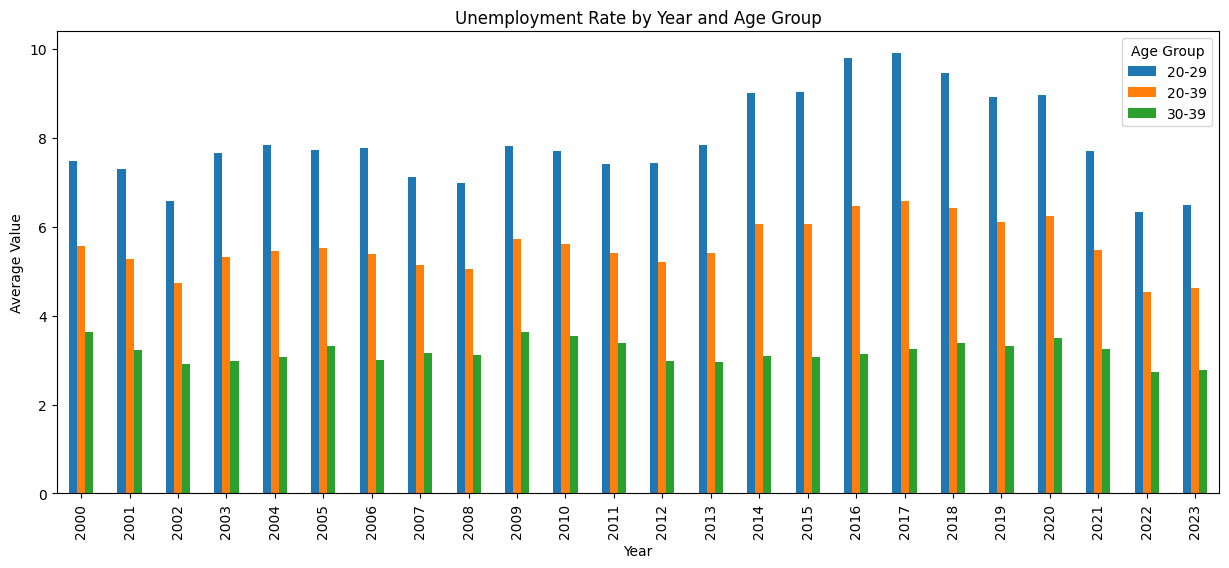

In [1]:
# 실업율
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('연령별_경제활동인구_총괄_20230621110321.csv',encoding='euc-kr')

# melt
melted_df = pd.melt(df, id_vars='연령계층별', var_name='year',value_name='value')

# 20,30대 실업율
def calculate_average_by_year(start_year, end_year):
    # 딕셔너리 생성
    average_values = {}
    # for문으로 start_year 부터 end_year까지 반복문
    for year in range(start_year, end_year + 1):
        filtered_df = melted_df[(melted_df['year'].str.startswith(str(year))) & (melted_df['year'].str.endswith('.6'))]
        average_value = filtered_df['value'].mean()
        average_values[str(year)] = average_value
    return average_values

# 20대 실업율
def calculate_average_by_year_20(start_year, end_year):
    # 딕셔너리 생성
    average_values = {}
    # for문으로 start_year 부터 end_year까지 반복문
    for year in range(start_year, end_year + 1):
        filtered_df = melted_df[(melted_df['year'].str.startswith(str(year))) & (melted_df['year'].str.endswith('.6'))
                                & (melted_df['연령계층별'].str.endswith('20 - 29세'))]
        average_value = filtered_df['value'].mean()
        average_values[str(year)] = average_value
    return average_values

# 30대 실업율
def calculate_average_by_year_30(start_year, end_year):
    # 딕셔너리 생성
    average_values = {}
    # for문으로 start_year 부터 end_year까지 반복문
    for year in range(start_year, end_year + 1):
        filtered_df = melted_df[(melted_df['year'].str.startswith(str(year))) & (melted_df['year'].str.endswith('.6'))
                                & (melted_df['연령계층별'].str.endswith('30 - 39세'))]
        average_value = filtered_df['value'].mean()
        average_values[str(year)] = average_value
    return average_values


average_by_year = calculate_average_by_year_20(2000, 2023)
average_by_year2 = calculate_average_by_year(2000, 2023)
average_by_year3 = calculate_average_by_year_30(2000, 2023)
#print(average_by_year2)
#print(average_by_year)
#print(average_by_year3)

# 데이터 추출
years = list(average_by_year.keys())
average_values = list(average_by_year.values())

# 데이터 프레임으로 변환 필요
df1 = pd.DataFrame({'Year': list(average_by_year.keys()), 'Value': list(average_by_year.values()), 'Age Group' : '20-29'})
df2 = pd.DataFrame({'Year': list(average_by_year2.keys()), 'Value': list(average_by_year2.values()), 'Age Group' : '20-39'})
df3 = pd.DataFrame({'Year': list(average_by_year3.keys()), 'Value': list(average_by_year3.values()), 'Age Group' : '30-39'})
combined_df = pd.concat([df2, df1, df3])
pivot_table = combined_df.pivot_table(index='Year', columns='Age Group', values='Value')

pivot_table.plot(kind='bar', figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Unemployment Rate by Year and Age Group')
plt.legend(title='Age Group')
plt.show()

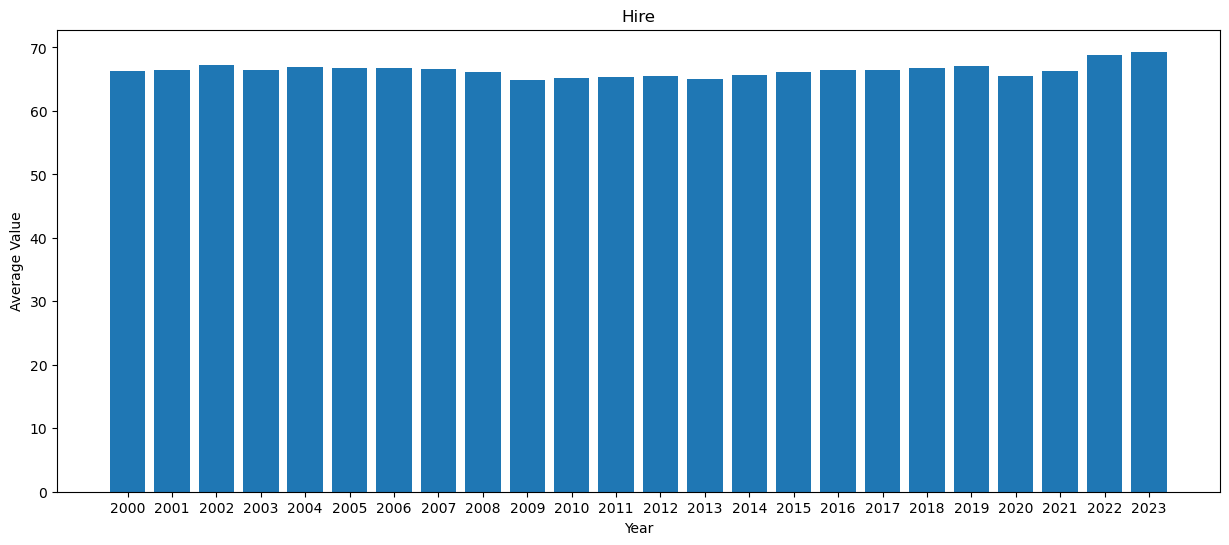

In [119]:
# 고용률
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('연령별_경제활동인구_총괄_20230621110321.csv',encoding='euc-kr')

# melt
melted_df = pd.melt(df, id_vars='연령계층별', var_name='year',value_name='value')

# 실업율 그래프 그리기
def calculate_average_by_year(start_year, end_year):
    # 딕셔너리 생성
    average_values = {}
    # for문으로 start_year 부터 end_year까지 반복문
    for year in range(start_year, end_year + 1):
        filtered_df = melted_df[(melted_df['year'].str.startswith(str(year))) & (melted_df['year'].str.endswith('.7'))]
        average_value = filtered_df['value'].mean()
        average_values[str(year)] = average_value
    return average_values

average_by_year = calculate_average_by_year(2000, 2023)

# 데이터 추출
years = list(average_by_year.keys())
average_values = list(average_by_year.values())

plt.figure(figsize=(15, 6))  # 가로 10인치, 세로 6인치의 크기로 그래프 생성
plt.bar(years, average_values)
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Hire')
plt.show()

In [60]:
import pandas as pd

# 원본 데이터 프레임 생성
df = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['John', 'Jane', 'Bob'],
    'Math_1': [90, 85, 95],
    'Math_2': [80, 92, 88],
    'Science_1': [75, 88, 92],
    'Science_2': [82, 90, 78]
})

# 데이터 프레임 출력 (중간 생략)

# 데이터 melting
melted_df = pd.melt(df, id_vars=['ID', 'Name'], var_name='Subject_Score', value_name='Score')

# melting된 데이터 프레임 출력
print(df)
print("\nMelted DataFrame:")
print(melted_df)


   ID  Name  Math_1  Math_2  Science_1  Science_2
0   1  John      90      80         75         82
1   2  Jane      85      92         88         90
2   3   Bob      95      88         92         78

Melted DataFrame:
    ID  Name Subject_Score  Score
0    1  John        Math_1     90
1    2  Jane        Math_1     85
2    3   Bob        Math_1     95
3    1  John        Math_2     80
4    2  Jane        Math_2     92
5    3   Bob        Math_2     88
6    1  John     Science_1     75
7    2  Jane     Science_1     88
8    3   Bob     Science_1     92
9    1  John     Science_2     82
10   2  Jane     Science_2     90
11   3   Bob     Science_2     78


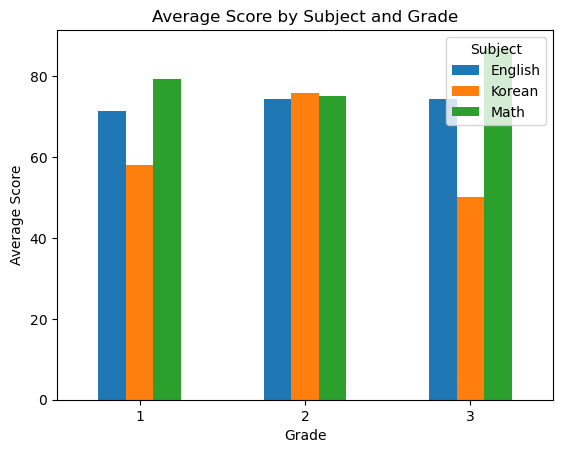

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
data = {'Grade': np.random.randint(1, 4, size=30),
        'Score': np.random.randint(50, 100, size=30),
        'Subject': np.random.choice(['Math', 'English', 'Korean'], size=30)}
df = pd.DataFrame(data)

# 과목별 평균 성적 계산
pivot_table = df.pivot_table(index='Grade', columns='Subject', values='Score', aggfunc='mean')

# 막대 그래프 그리기
pivot_table.plot(kind='bar')
plt.title('Average Score by Subject and Grade')
plt.xlabel('Grade')
plt.ylabel('Average Score')
plt.legend(title='Subject')
plt.xticks(rotation=0)
plt.show()

